# **Multivariate Exploratory Analysis of the Tips Dataset**

### What’s the distribution of bills throughout the week? Reveal which day tends to have higher spending.

> On average, customers spend the most on Saturdays ```($20.44)``` and Sundays ```($21.41)```, with Thursday and Friday showing slightly lower averages between ```$17–18```. Saturday also recorded the highest total spending, likely due to a larger number of customers.

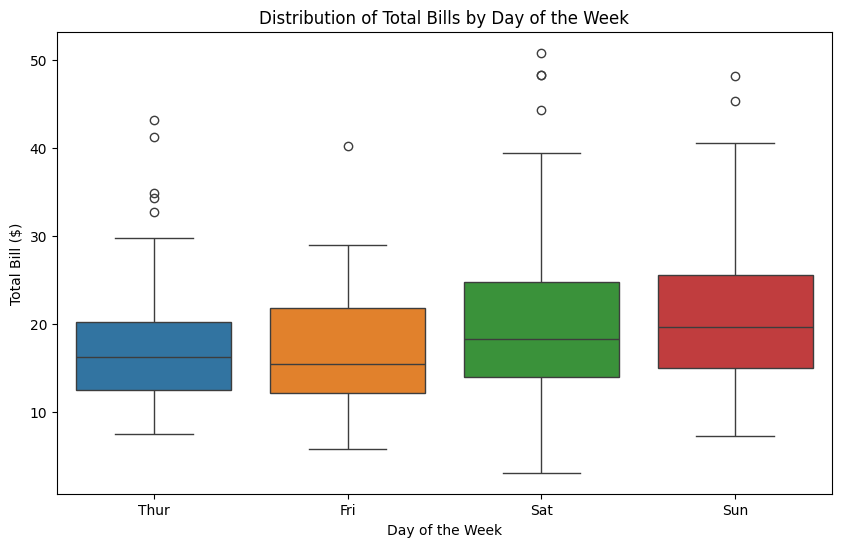

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

tips = sns.load_dataset("tips")

tips.head()

plt.figure(figsize=(10, 6))
sns.boxplot(x="day", y="total_bill", hue="day", data=tips)
plt.title("Distribution of Total Bills by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill ($)")
plt.show()

### How does tip amount vary by gender? Compare how tipping behavior may differ between male and female customers.

> Males tend to tip slightly more than females on average ```($3.09 vs $2.83)```, although the difference is relatively small. However, tipping behavior among males appears to be more variable compared to females.



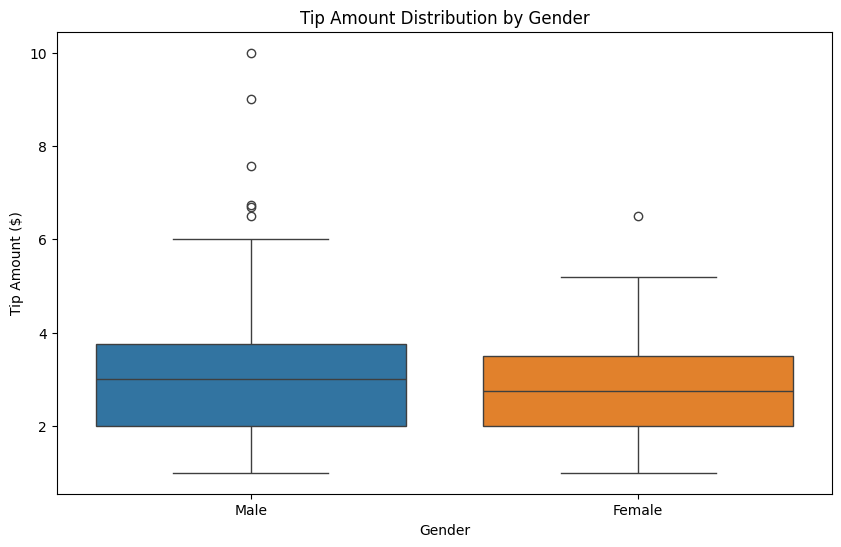

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="sex", y="tip", hue="sex", data=tips)
plt.title("Tip Amount Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Tip Amount ($)")
plt.show()

### Do smokers tip differently than non-smokers across time?  Reveal patterns in tipping depending on smoking status and meal time.

> Non-smokers tend to tip more consistently regardless of whether it's lunch or dinner. In contrast, smokers tip less during lunch ```($2.73)``` and slightly more during dinner ```($3.02)```, indicating time-based variations in their tipping habits.

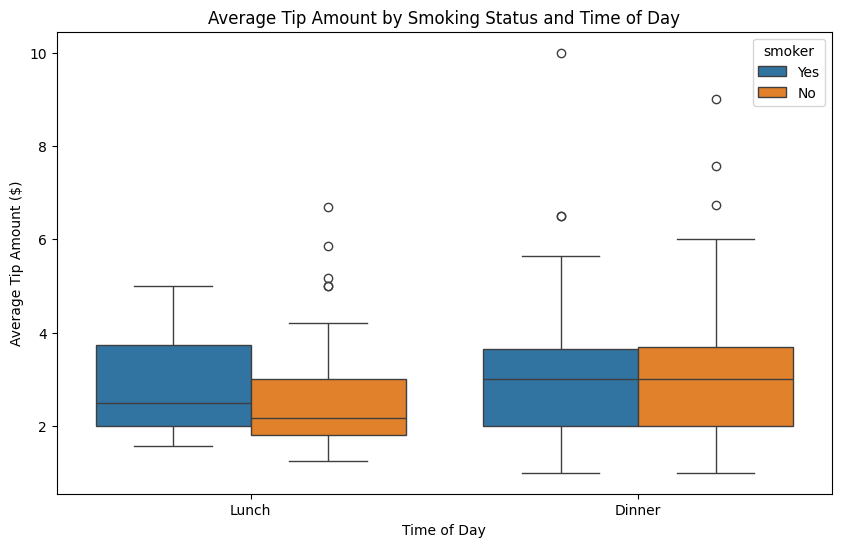

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="time", y="tip", hue="smoker", data=tips)
plt.title("Average Tip Amount by Smoking Status and Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Tip Amount ($)")
plt.show()

### What’s the tipping behavior by party size and gender? Show if tipping scales with group size and whether gender plays a role in larger parties.

> Tip amounts do not necessarily increase with party size when calculated per person. However, among larger groups ```(4 or more)```, males generally tip more than females, suggesting some influence of gender on group tipping patterns.

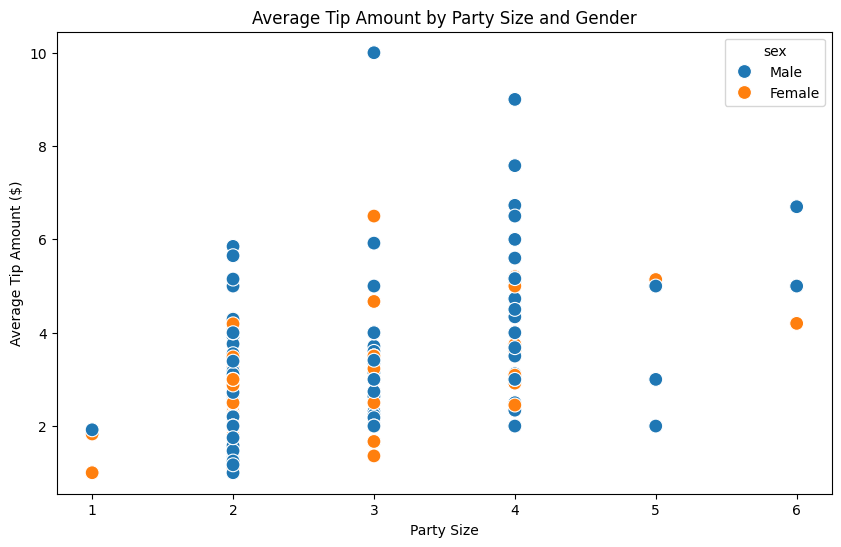

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="size", y="tip", hue="sex", data=tips, s=100)
plt.title("Average Tip Amount by Party Size and Gender")
plt.xlabel("Party Size")
plt.ylabel("Average Tip Amount ($)")
plt.show()

### Is there a relationship between total bill and tip, broken down by day? Highlight day when generous tippers come in and how bills/tips pair.

> There is a strong positive correlation between the total bill and tip amount across all days ```(correlation coefficient ≈ 0.6–0.7)```. Saturday shows the strongest relationship, with the highest tip percentages observed despite having the largest bills.

<Figure size 1000x600 with 0 Axes>

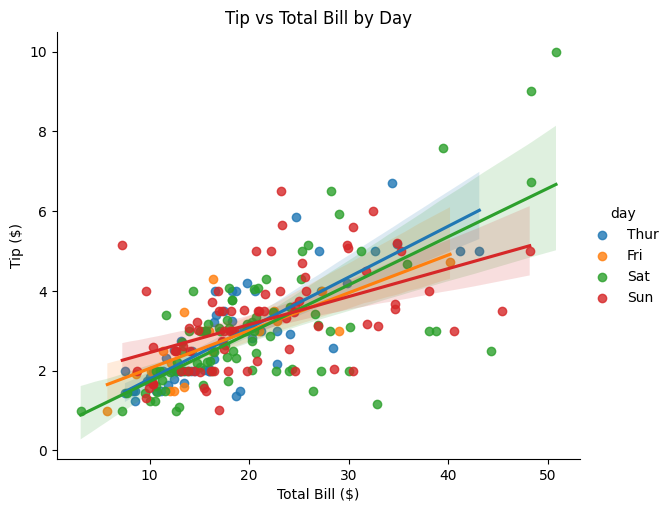

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='total_bill', y='tip', hue='day', data=tips, aspect=1.2)
plt.title('Tip vs Total Bill by Day')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.show()

### How does tipping vary between Lunch and Dinner, split by gender? Reveal how tip amounts are concentrated by time and gender, use violin plot.

> Tips are generally higher during dinner for both genders, and the variation is greater as well. Males show more extreme tipping behavior in the evening, while females tend to maintain more consistent tipping amounts between lunch and dinner.

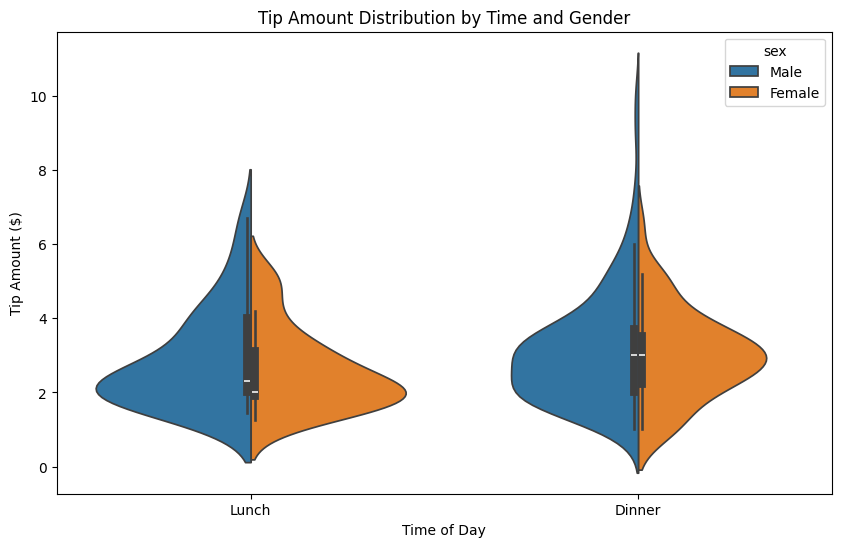

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="time", y="tip", hue="sex", split=True, data=tips)
plt.title("Tip Amount Distribution by Time and Gender")
plt.xlabel("Time of Day")
plt.ylabel("Tip Amount ($)")
plt.show()

### Which day sees the most customers?

> Saturday attracts the most customers ```(87)```, followed by Sunday ```(76)```, Thursday ```(62)```, and Friday ```(19)```. This higher volume likely contributes to Saturday’s top revenue performance.

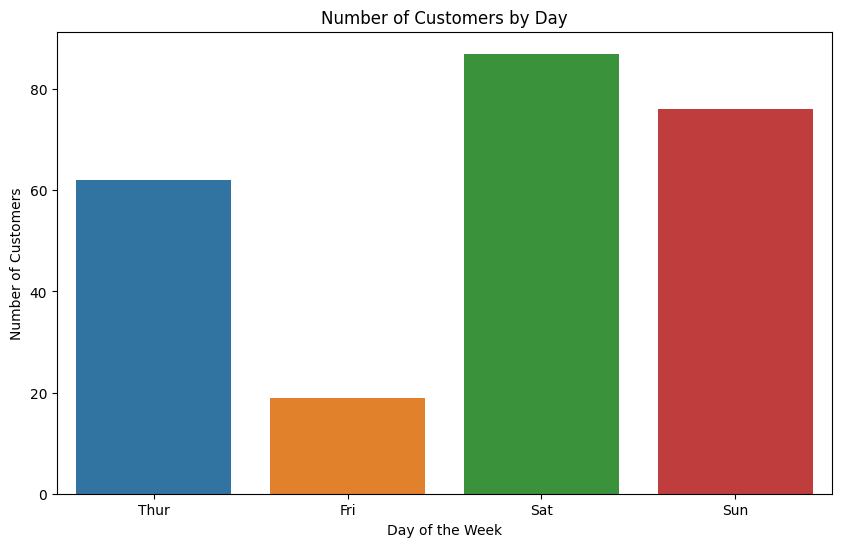

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="day", hue="day", data=tips)
plt.title("Number of Customers by Day")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Customers")
plt.show()

### What variables are most correlated with tip amount? What does it say, generally?

> The total bill has the strongest correlation with the tip amount ```(r = 0.676)```, followed by party size ```(r = 0.489)```. This suggests that the tip is primarily influenced by how much was spent, which aligns with expectations.

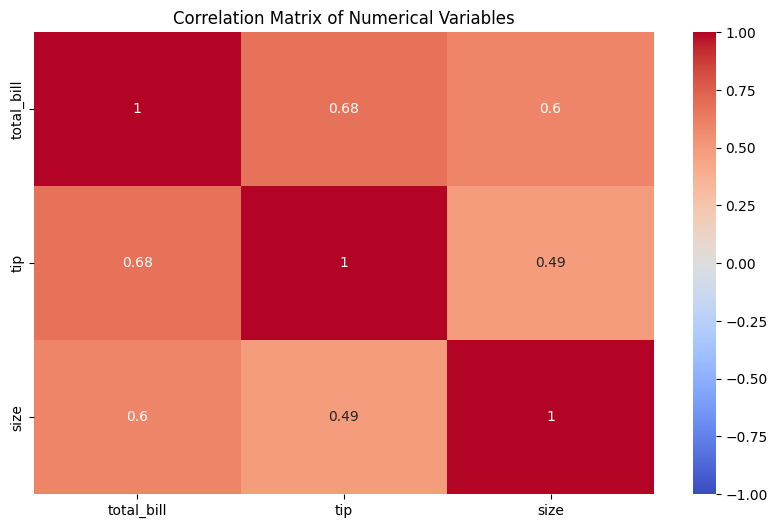

In [ ]:
corr = tips[["total_bill", "tip", "size"]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

### Is party size associated with higher bills or tips?

> Larger groups tend to generate higher bills and tip amounts overall. However, their tip percentages ```(tip relative to bill size)``` are slightly lower, which may reflect a "group discount" effect in tipping behavior.

/tmp/ipython-input-21-2990993388.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='size', y='total_bill', data=tips, ci=None, palette="Set1")
/tmp/ipython-input-21-2990993388.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='size', y='total_bill', data=tips, ci=None, palette="Set1")
/tmp/ipython-input-21-2990993388.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='size', y='tip', data=tips, ci=None, palette="Set2")
/tmp/ipython-input-21-2990993388.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='size', y='tip', data=tips, ci=None, palette="Set2")


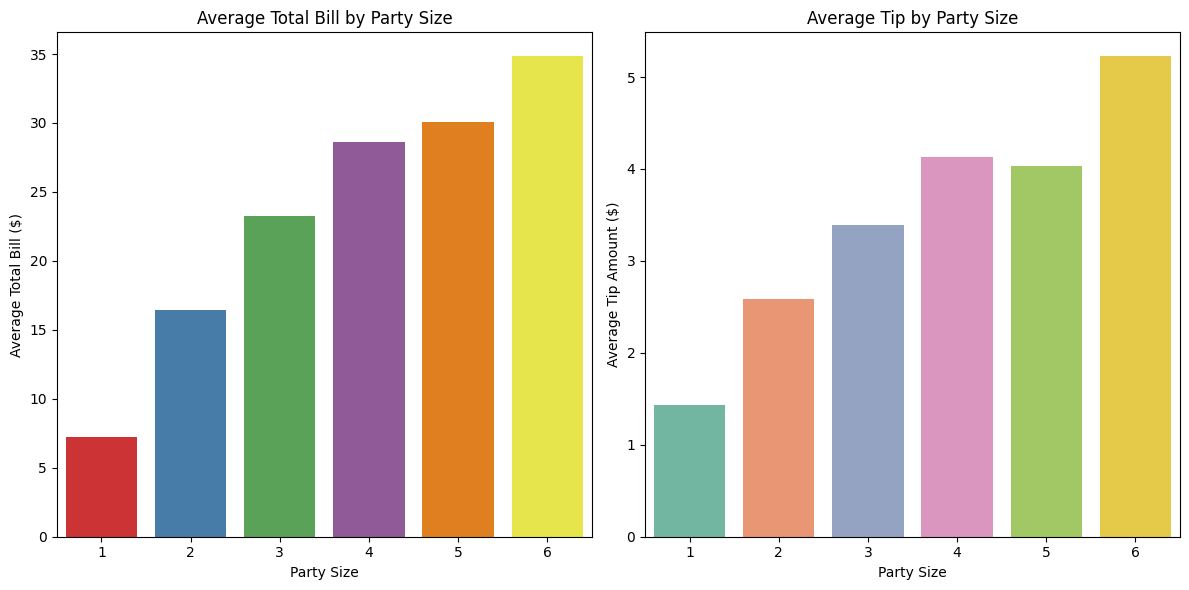

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='size', y='total_bill', data=tips, ci=None, palette="Set1")

plt.title("Average Total Bill by Party Size")
plt.xlabel("Party Size")
plt.ylabel("Average Total Bill ($)")

plt.subplot(1, 2, 2)
sns.barplot(x='size', y='tip', data=tips, ci=None, palette="Set2")
plt.title("Average Tip by Party Size")
plt.xlabel("Party Size")
plt.ylabel("Average Tip Amount ($)")

plt.tight_layout()
plt.show()

### Do total bill and tip always increase together?

> While there is a general trend of higher tips with higher bills ```(r = 0.676)```, exceptions exist. Some customers with high bills tip proportionally less, while others with moderate bills give relatively generous tips.

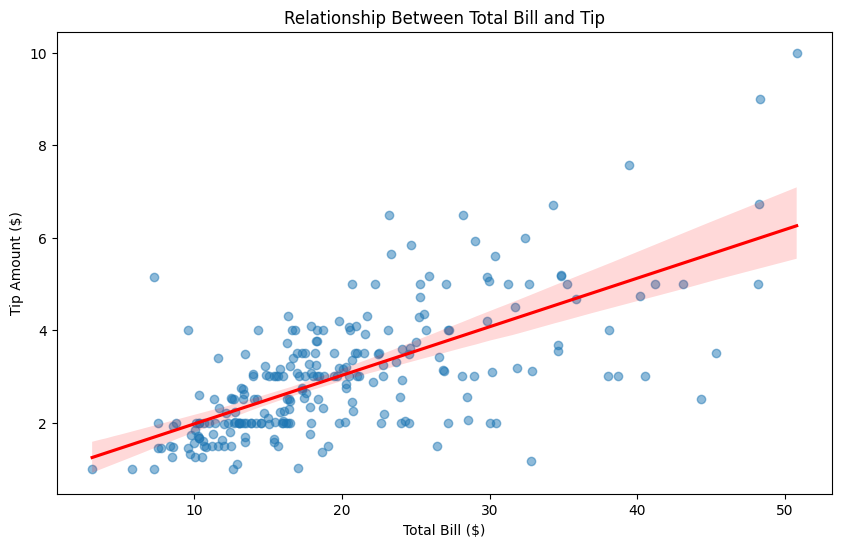

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x="total_bill", y="tip", data=tips, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Relationship Between Total Bill and Tip")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip Amount ($)")
plt.show()

### How do tip and total_bill relate across days? Spot whether certain days (e.g. Saturday) have bigger bills and tips.

> Saturday demonstrates the strongest correlation between bill and tip amounts and the highest averages for both. Weekends ```(Saturday and Sunday)``` see higher spending and tipping, while weekdays tend to be more moderate.

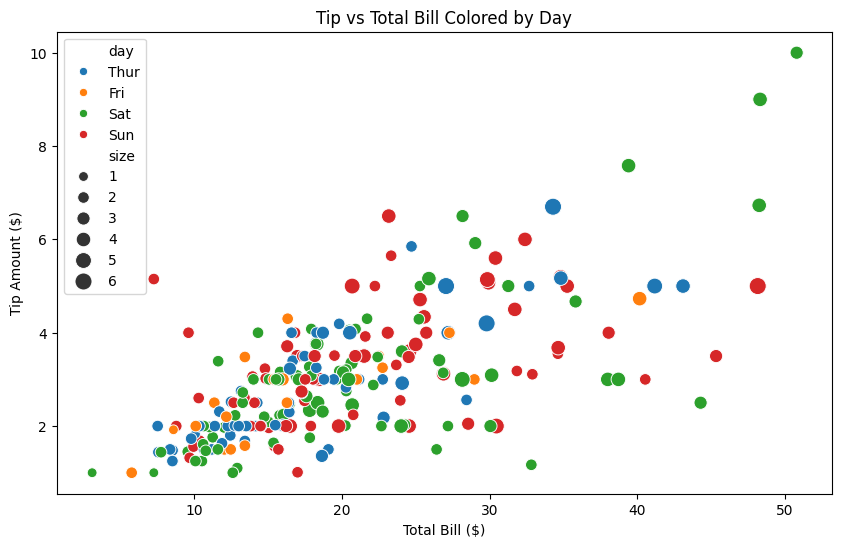

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, size="size", sizes=(50,150))
plt.title("Tip vs Total Bill Colored by Day")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip Amount ($)")
plt.show()

### Are bigger groups more generous tippers?  Use hue to reveal gender-based patterns among party size and tipping.

> Not necessarily. Although larger parties leave higher absolute tips, their tip percentages tend to decrease as group size increases. Males in bigger groups are generally more generous than females, but the overall trend suggests lower generosity per dollar spent.

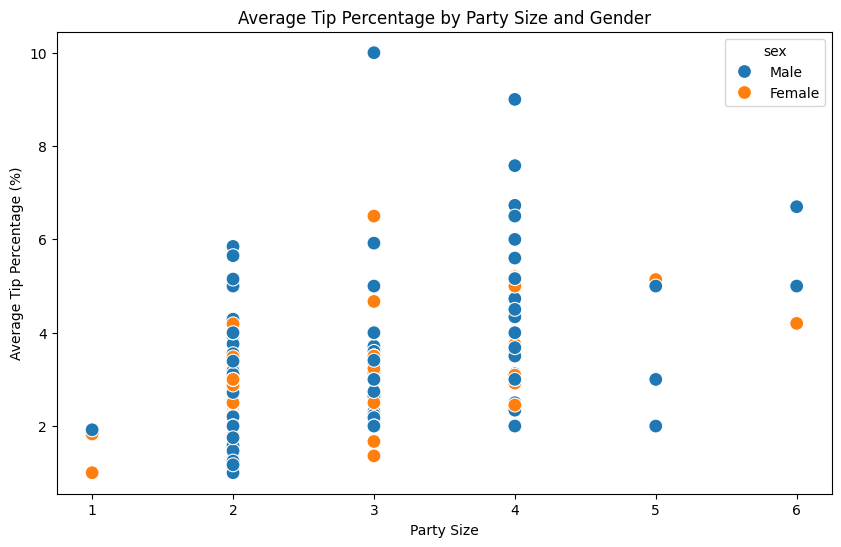

In [ ]:
tips["tip_percentage"] = tips["tip"] / tips["total_bill"] * 100

plt.figure(figsize=(10, 6))
sns.scatterplot(x="size", y="tip", hue="sex", data=tips, s=100)
plt.title("Average Tip Percentage by Party Size and Gender")
plt.xlabel("Party Size")
plt.ylabel("Average Tip Percentage (%)")
plt.show()

### Do males and females show different spending or tipping habits? Highlight behavior differences by color-coded trends.

> Males tend to spend and tip more in total, whereas females are more consistent with their tipping percentages. Male customers also show a wider range of tipping and spending behaviors, possibly reflecting diverse financial backgrounds or personal attitudes toward tipping.

<Figure size 1000x600 with 0 Axes>

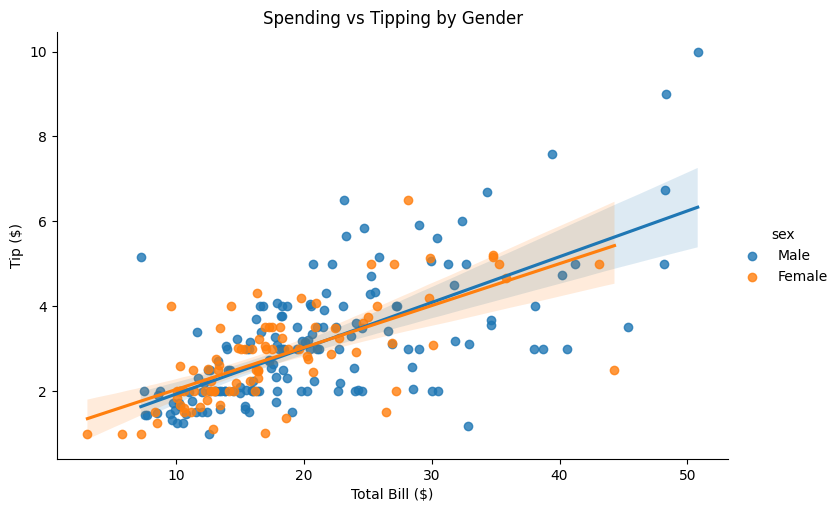

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(x="total_bill", y="tip", hue="sex", data=tips, aspect=1.5)
plt.title("Spending vs Tipping by Gender")
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.show()